Scene Bounding Rectangle: Rectangle(x=51885, y=234, w=4096, h=3008)
(3008, 4096, 1)


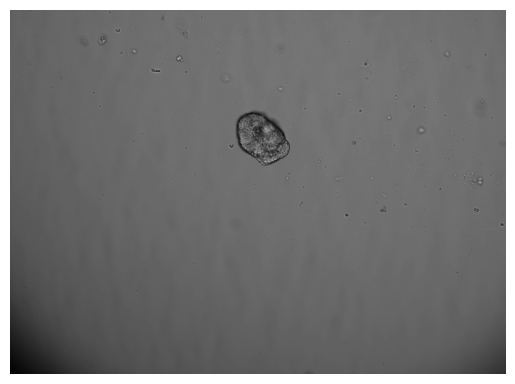

In [43]:
from pylibCZIrw import czi as pyczi
import matplotlib.pyplot as plt

filepath = r"D:\RawDataLaurent\Source\2023-02-01\20230201 x10 brigh 228 position 25Zstack.czi"

# Open the CZI document to read
with pyczi.open_czi(filepath) as czidoc:
    # Read a specific 2D image plane
    # Adjust 'plane' parameters as per your file's specifics
    scene_index = 0

    # Get the bounding rectangle for the specified scene
    scene_bounding_rectangle = czidoc.scenes_bounding_rectangle[scene_index]
    print("Scene Bounding Rectangle:", scene_bounding_rectangle)

    # Read a 2D image plane from the specified scene
    # Adjust 'plane' parameters as per your file's specifics
    image2d = czidoc.read(plane={"Z":10}, scene=scene_index)
    print(image2d.shape)

    # Check if the image data is in the expected format
    if image2d.ndim == 2:  # Grayscale image
        plt.imshow(image2d, cmap='gray')
    elif image2d.ndim == 3:  # Color image
        plt.imshow(image2d, cmap= "gray")
    else:
        raise ValueError("Unsupported image format")

    plt.axis('off')  # To not display axes
    plt.show()

In [3]:
import matplotlib.pyplot as plt
from pylibCZIrw import czi as pyczi
import os
from PIL import Image
import numpy as np

def normalize_intensity_distribution(image, lower_percentile=2.5, upper_percentile=97.5):
    """
    Normalize the image based on the lower and upper percentiles to enhance contrast.
    
    :param image: Input image as a NumPy array.
    :param lower_percentile: Lower percentile for intensity scaling.
    :param upper_percentile: Upper percentile for intensity scaling.
    :return: Image with normalized intensity distribution.
    """
    # First, calculate the lower and upper intensity bounds
    lower_bound = np.percentile(image, lower_percentile)
    upper_bound = np.percentile(image, upper_percentile)
    
    # Then, scale the intensities in the image to the 0-255 range based on these bounds
    # Any intensity lower than the lower bound is set to 0, and anything higher than the upper bound is set to 255
    image_normalized = np.clip((image - lower_bound) / (upper_bound - lower_bound) * 255, 0, 255).astype(np.uint8)
    
    return image_normalized

def save_images_from_czi(input_path, output_path):

    # Check if output folder exists, if not, create it
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Iterate over all CZI files in the source folder
    for file in os.listdir(input_path):
        if file.endswith(".czi"):
            filepath = os.path.join(input_path, file)
            with pyczi.open_czi(filepath) as czidoc:
                # Iterate over all scenes
                for scene_index in range(len(czidoc.scenes_bounding_rectangle)):
                    output_image_path = os.path.join(output_path, f"{os.path.splitext(file)[0]}_Scene{scene_index}.png")
                    if not os.path.exists(output_image_path):
                        image2d = czidoc.read(scene=scene_index)

                        image2d = normalize_intensity_distribution(image2d)
                        
                        if image2d.ndim == 2:  # Grayscale image
                            plt.imshow(image2d, cmap='gray')
                        elif image2d.ndim == 3:  # Color image
                            plt.imshow(image2d, cmap="gray")
                        else:
                            raise ValueError("Unsupported image format")
                        
                        plt.axis('off')
                        
                        # Save the image
                        plt.savefig(output_image_path, bbox_inches='tight', pad_inches=0, dpi=250)
                        plt.close()
    

In [4]:
save_images_from_czi(r"\\sv-nas1.rcp.epfl.ch\ptbet-raw\BET data\Laurent Gurtler\10x_processed_images", r"\\sv-nas1.rcp.epfl.ch\ptbet-raw\BET data\Laurent Gurtler\images")